Você deve entregar :

1- um código para resolver du/dt=(u-t)/(u+t) com método Backward Euler + método de Ponto Fixo.

2- Resolva a solução analítica com o método de Ponto Fixo.

3- Trace os resultados.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def BE_FP(t_0:float = 0, u_0:float = 1, h:float = 0.1, max_t:float = 5, eps:float = 0.01):
    '''Backward Euler + Fix Point function to solve du/dt=(u-t)/(u+t), returns the t_n, u_n lists
    and the values h and eps.
    You can set the initial time (t_0), the initial condition (u_0), the size of each step (h),
    the size of the difference between the phi_ns (eps), and the max time (max_t)'''

    t_n = [t_0]   # t_n list, already with the initial time
    u_n= [u_0]   # u_n list, already with the initial condition
    n = 0   # actual n value
    while t_n[-1] <= max_t:
        t_n.append(t_n[-1]+h)   # updating time
        phi_0 = u_n[n]+h*(u_n[n]-t_n[-1])/(u_n[n]+t_n[-1])
        phi_n = [phi_0,phi_0+(eps*2)]   # creating phi_n list with phi_0 and phi_0+(eps*2), this second value is here just to be able to start the loop below

        while abs(phi_n[-1] - phi_n[-2]) > eps:   # finding the best phi to add in the u_n list
            phi_i = u_n[n]+h*(phi_n[-1]-t_n[-1])/(phi_n[-1]+t_n[-1])
            phi_n.append(phi_i)
        u_n.append(phi_n[-1])   # adding the new u_n
        n += 1
    return t_n, u_n, h, eps

Text(0, 0.5, 'u_n')

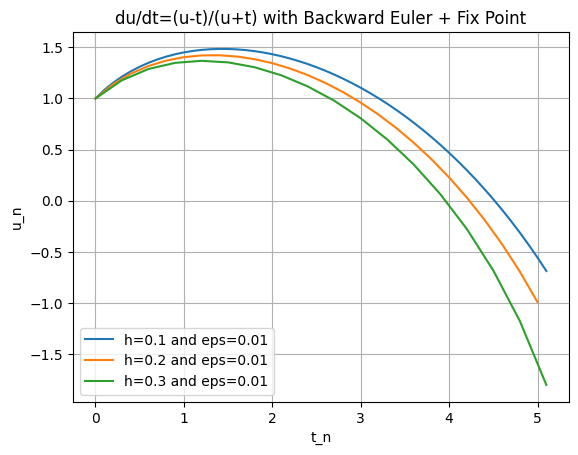

In [ ]:
'Plotting some graphs'
t1_n, u1_n, h1, eps1 = BE_FP()
t2_n, u2_n, h2, eps2 = BE_FP(h=0.2)
t3_n, u3_n, h3, eps3 = BE_FP(h=0.3)

plt.plot(t1_n,u1_n,label=f'h={h1} and eps={eps1}')
plt.plot(t2_n,u2_n,label=f'h={h2} and eps={eps2}')
plt.plot(t3_n,u3_n,label=f'h={h3} and eps={eps3}')
plt.legend()
plt.grid()
plt.title('du/dt=(u-t)/(u+t) with Backward Euler + Fix Point')
plt.xlabel('t_n')
plt.ylabel('u_n')